# Test IEEE 14 - VSG

static Gen is for power flow calculation, including '' and '' <br>
dynamci Gen is for TDS, indlucing 'GENROW' and 'GENCAL'

In [12]:
import andes
import os
import pandas as pd
import pandapower as pp

# andes and pandapower version
print(f'Andes version: {andes.__version__}')
print(f'Pandapower version: {pp.__version__}')

Andes version: 1.6.2.post3.dev0+g4b164287
Pandapower version: 2.8.0


1. *setup()* is to configure the case, once setup, cannot add new device
   or setup=False and run *ss.setup()* after setting
2. $S_{base}=100MVA$ in the case file
3. 'Toggler' is a group to add connect and disconnect device at specific time.

In [13]:
# get andes case from excel
dir_path = os.path.abspath('..')
case_path = '/Test_buxin/ieee14_vsg1.xlsx'
case = dir_path + case_path
ssa = andes.load(case,
                 setup=False,
                 no_output=True,
                 default_config=False)

Line: unused data {'rate_a': 200}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 100}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 20}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 50}
Line: unused data {'rate_a': 20}
Line: unused data {'rate_a': 20}
Line: unused data {'rate_a': 20}
Line: unused data {'rate_a': 20}
Line: unused data {'rate_a': 20}


In [14]:
# Add a Toggler that disconnects `GENROU_2` at t=1 s
ssa.add("Toggler", dict(model='SynGen', dev="GENROU_5", t=1.0))

ssa.setup()

ssa.Toggler.as_df()

,idx,u,name,model,dev,t
uid,,,,,,
0,1,0.0,Toggler_1,Line,Line_1,1.0
1,2,0.0,Toggler_2,Line,Line_1,1.1
2,Toggler_3,1.0,Toggler_3,SynGen,GENROU_5,1.0


In [15]:
# set load as constant load
# ssa.PQ.config.p2p = 1
# ssa.PQ.config.q2q = 1
# ssa.PQ.config.p2z = 0
# ssa.PQ.config.q2z = 0
# ssa.PQ.pq2z = 0

# Turn on numba to accelerate TDS
ssa.config.numba
ssa.PFlow.run()

True

In [16]:
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

<Toggler Toggler_3>: SynGen.GENROU_5 status changed to 0 at t=1.0 sec.


Time step reduced to zero. Convergence is not likely.
Simulation terminated at t=4.2461 s.


* Max. iter. 15 reached for t=4.246143s, h=0.000067s, max inc=4.154 


False

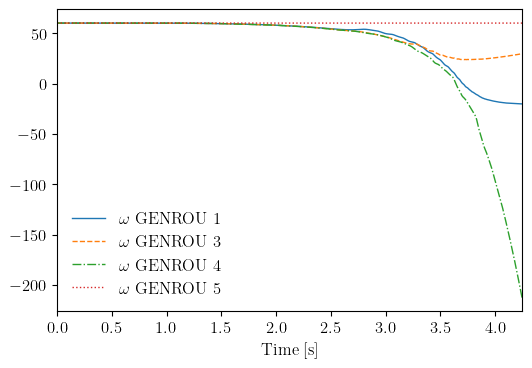

(<Figure size 600x400 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [17]:
ssa.TDS.load_plotter()

ssa.TDS.plt.plot(ssa.GENROU.omega,
                a=(0, 2, 3, 4),
                ytimes=60,
               )